## Econ 212 Class noteboook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # HP filter and OLS regression
import datetime
from datetime import datetime as dt
import matplotlib.dates as mdates
import importlib
from pandas_datareader.fred import FredReader

In [2]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 2.5

In [3]:
import data_load_212
importlib.reload(data_load_212)

<module 'data_load_212' from '/Users/awellman/Documents/SIEPR/GitHub/macrodata-wellman/Econ212/data_load_212.py'>

Function to take best linear fit, decadal average growth

In [4]:
def reg_fit(Y,X, verbose=False):
    X = sm.add_constant(X)
    model=sm.OLS(Y,X)
    results = model.fit()
    if verbose:
        print(results.summary())
    return results.predict(), results.params

def decadal_average_growth(ser, dec=False):
    if dec:
        # Actual decadal growh
        t=ser.loc['1950-03-31':'1959-12-31']
        nq=t.index.size
        print('Average for 1950s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1960-03-31':'1969-12-31']
        nq=t.index.size
        print('Average for 1960s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1970-03-31':'1979-12-31']
        nq=t.index.size
        print('Average for 1970s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1980-03-31':'1989-12-31']
        nq=t.index.size
        print('Average for 1980s :', round(np.log(t[-1]/t[0])/(nq/4),4))  

        t=ser.loc['1990-03-31':'1999-12-31']
        nq=t.index.size
        print('Average for 1990s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2000-03-31':'2009-12-31']
        nq=t.index.size
        print('Average for 2000s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2010-03-31':'2019-12-31']
        nq=t.index.size
        print('Average for 2010s :', round(np.log(t[-1]/t[0])/(nq/4),4))
    else:
        # 20-year growth
        t=ser.loc['1950-03-31':'1969-12-31']
        nq=t.index.size
        print('Average for 1950/60 :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1970-03-31':'1999-12-31']
        nq=t.index.size
        print('Average for 1970/80 :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2000-03-31':'2019-12-31']
        nq=t.index.size
        print('Average for 2000/10 :', round(np.log(t[-1]/t[0])/(nq/4),4))


# Quarterly data

Load data, can use either `same_def` or `own_def` for own deflator

In [5]:
series = data_load.get_fred_data('Q','own_def')

NameError: name 'data_load' is not defined

In [ ]:
stateu = data_load.get_state_u_data('Q')

#### Sample selection

In [ ]:
capital=FredReader('RKNANPUSA666NRUG', start='1947').read()

In [ ]:
series = series.loc['1954-12-31':dt.now().strftime('%Y-%m-%d')]
series.tail()

,yn,cn,gn,invest,nxn,impn,expn,y,c,g,...,dgs10,breakeven10,nondur,dur,govexpen,solow,thours,emplyment,mrwage,capitalu
date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,26408.405,17917.039,4572.408,4796.162,-877.204,3891.004,3013.800,21989.981,15171.391,3714.800,...,3.826721,2.340000,3918.634,2129.012,9175.833,1.016796,259928.0,71.398340,363.0,79.939933
2023-03-31,26813.601,18269.569,4643.890,4725.828,-825.687,3890.491,3064.804,22112.329,15312.850,3758.768,...,3.646290,2.290806,3938.980,2194.859,9326.383,1.016796,259928.0,71.781567,363.0,79.564867
2023-06-30,27063.012,18419.007,4669.808,4780.290,-806.093,3767.851,2961.759,22225.350,15343.553,3789.786,...,3.595714,2.226032,3951.071,2193.586,9422.404,1.016796,259928.0,71.969496,365.0,79.413500
2023-09-30,27610.128,18679.496,4794.830,4915.033,-779.231,3809.982,3030.751,22490.692,15461.382,3843.355,...,4.149683,2.325079,4027.279,2204.485,10007.677,1.016796,259928.0,72.021024,365.0,79.492900
2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.447097,2.293387,NaN,NaN,NaN,1.016796,259928.0,71.979163,NaN,78.731850


In [ ]:
NQ=series.index.size # Number of quarters in data
series['ypop']=series['y']/series['pop'] # Output per person
series['t']=np.arange(0,NQ) # Output per person

In [ ]:
# Drop the last entry from the DataFrame
series = series.drop(series.tail(1).index)  # This removes the last row

In [ ]:
series

,yn,cn,gn,invest,nxn,impn,expn,y,c,g,...,nondur,dur,govexpen,solow,thours,emplyment,mrwage,capitalu,ypop,t
date,,,,,,,,,,,,,,,,,,,,,
1954-12-31,399.734,245.093,91.356,62.139,1.145,15.460,16.605,2936.852,1761.703,1049.200,...,103.431,35.064,NaN,0.667260,110356.50,NaN,NaN,NaN,0.017897,0
1955-03-31,413.073,251.398,91.869,68.702,1.104,16.169,17.273,3020.746,1801.231,1049.830,...,104.502,38.437,NaN,0.672531,111238.00,NaN,NaN,NaN,0.018329,1
1955-06-30,421.532,256.466,92.533,72.688,-0.155,17.097,16.942,3069.910,1835.737,1039.546,...,106.122,40.709,NaN,0.671574,111837.75,NaN,NaN,NaN,0.018553,2
1955-09-30,430.221,260.651,94.099,74.747,0.724,17.421,18.145,3111.379,1858.411,1046.213,...,106.942,42.421,NaN,0.670617,112437.50,NaN,NaN,NaN,0.018721,3
1955-12-31,437.092,264.639,93.331,78.882,0.240,18.109,18.349,3130.068,1881.748,1025.470,...,109.046,41.413,NaN,0.669661,113037.25,NaN,NaN,NaN,0.018741,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,25994.639,17684.189,4477.855,4724.621,-892.026,3976.524,3084.498,21851.134,15127.399,3666.982,...,3903.685,2143.128,8894.032,1.016796,259928.00,71.395872,362.0,80.760167,0.065485,271
2022-12-31,26408.405,17917.039,4572.408,4796.162,-877.204,3891.004,3013.800,21989.981,15171.391,3714.800,...,3918.634,2129.012,9175.833,1.016796,259928.00,71.398340,363.0,79.939933,0.065811,272
2023-03-31,26813.601,18269.569,4643.890,4725.828,-825.687,3890.491,3064.804,22112.329,15312.850,3758.768,...,3938.980,2194.859,9326.383,1.016796,259928.00,71.781567,363.0,79.564867,0.066108,273


## Begin Graphs

## GDP per Person vs a linear trend (Figure 1 Lecture 1)

In [ ]:
series['ypoplogfit'], regparams=reg_fit(np.log(series['ypop']), series['t'], verbose=False)
series['ylogfit'], regparams=reg_fit(np.log(series['y']), series['t'], verbose=False)

Text(0.5, 1.0, 'U.S. real GDP Per Person ($Y_t/pop_t$)')

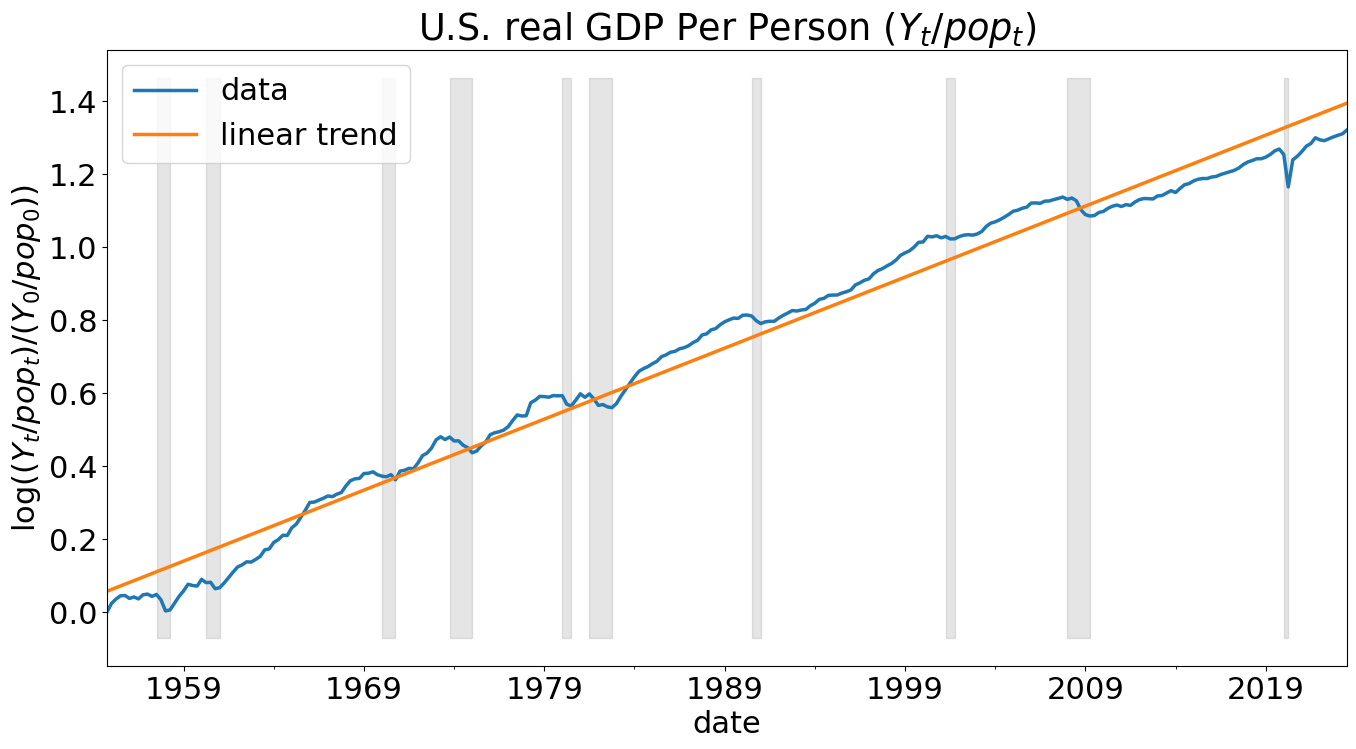

In [ ]:
(np.log(series['ypop'])-np.log(series['ypop'][0])).plot(label='data')
(series['ypoplogfit']-np.log(series['ypop'][0])).plot(label='linear trend')
yl, yh = plt.ylim()
plt.legend()
plt.ylabel(r'$\log((Y_t/pop_t)/(Y_0/pop_0))$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('U.S. real GDP Per Person ($Y_t/pop_t$)')

## Taking Out the Trend: The HP Filter (Lecture 1 Figure 2)

In [ ]:
#cycle_ypop, trend_ypop=sm.tsa.filters.hpfilter(np.log(series['ypop']),100000000000)
#lambdahp=100000000000
lambdahp=1600
cycle_y, trend_y=sm.tsa.filters.hpfilter(np.log(series['y']),lambdahp)
cycle_ypop, trend_ypop=sm.tsa.filters.hpfilter(np.log(series['ypop']),lambdahp)
#trend_bk.plot()

Text(0.5, 1.0, 'US Log Real GDP Per Person')

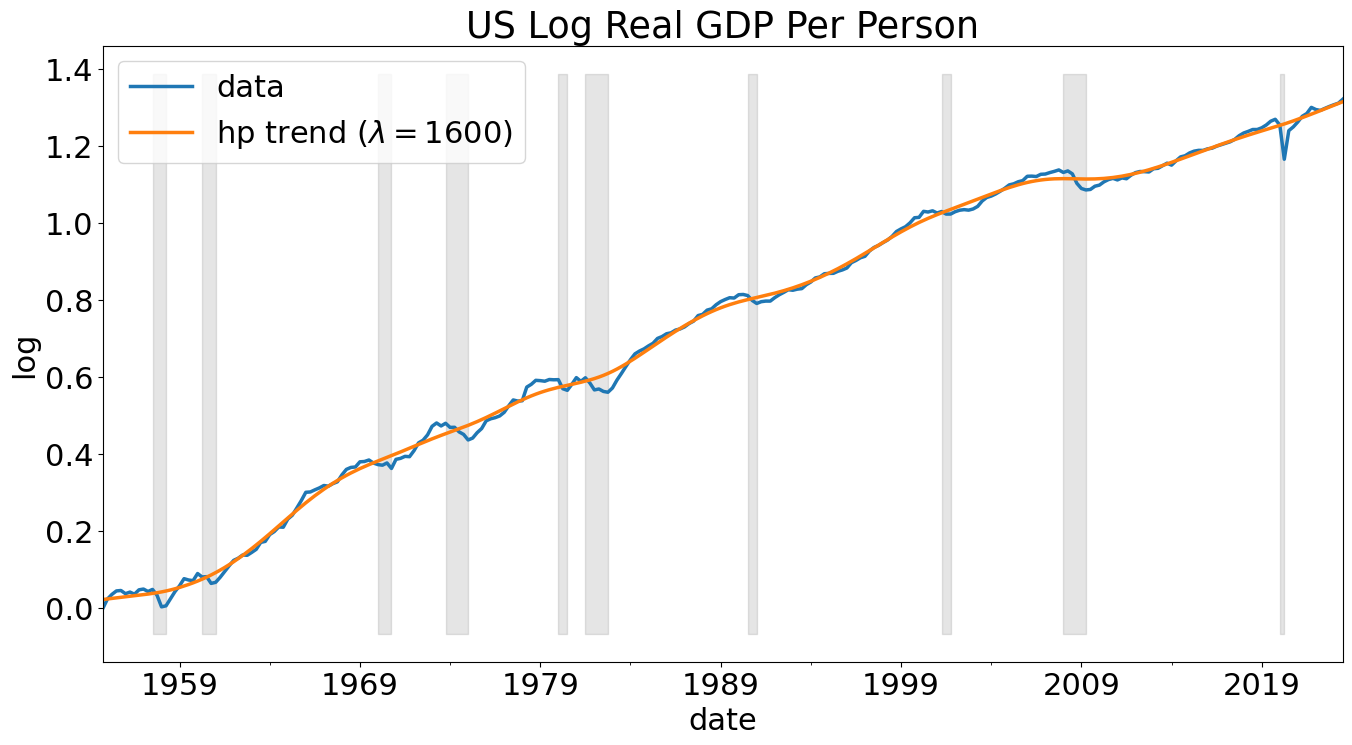

In [ ]:
(np.log(series['ypop'])-np.log(series['ypop'][0])).plot(label='data')
(trend_ypop-np.log(series['ypop'][0])).plot(label=r'hp trend ($\lambda=1600$)')
yl, yh = plt.ylim()
plt.ylabel('log')
plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('US Log Real GDP Per Person')
# plt.savefig(f'Export/us_log_realgdp_hptrend.pdf', format='pdf', transparent=True);

## US output: detrending matters, Business cycles more severe & persistent... (Lecture 1 Figure 3)

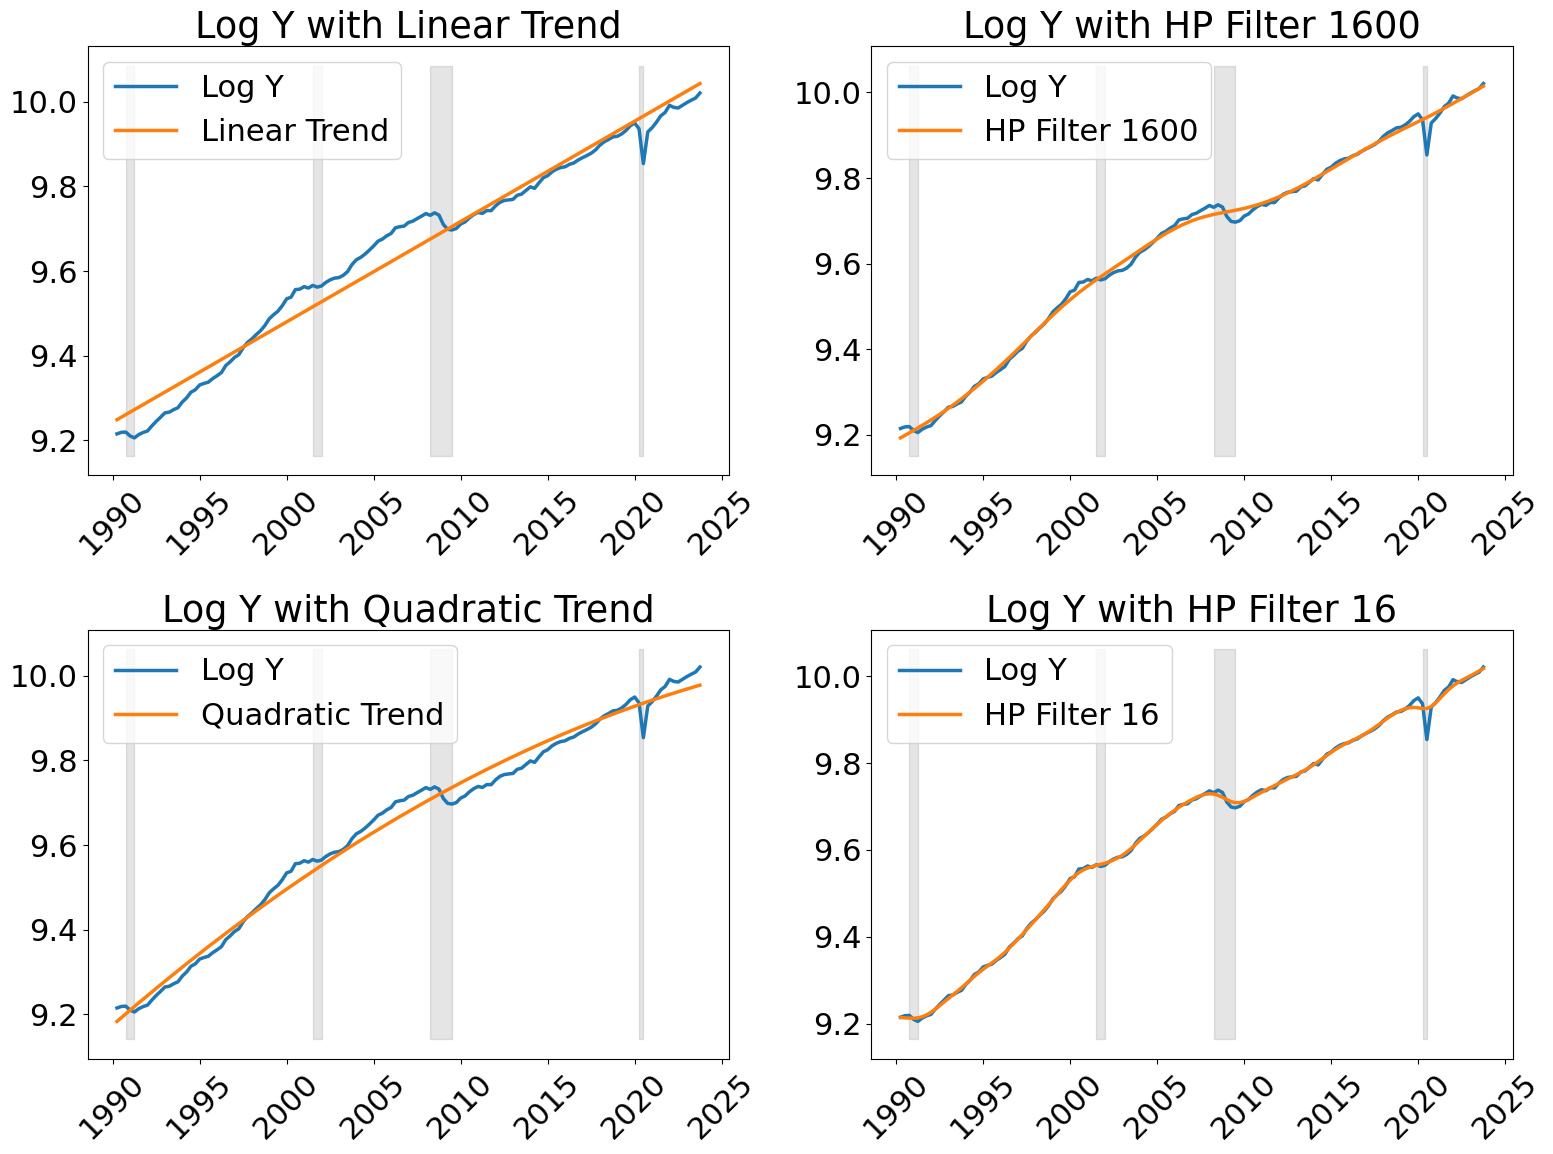

In [ ]:
# Filter the DataFrame to start from 1990 and make a copy to avoid SettingWithCopyWarning
series2 = series[series.index >= '1990-01-01'].copy()

# Recalculate 't' since we are starting from 1990 now
series2['t'] = np.arange(len(series2)) # Time index

# Log of GDP
series2['ylog'] = np.log(series2['y'])

# Linear Trend
series2['ypoplogfit'], regparams = reg_fit(series2['ylog'], series2['t'], verbose=False)

# HP Filters
lambdahp_1600 = 1600
lambdahp_16 = 16
cycle_y_1600, trend_y_1600 = sm.tsa.filters.hpfilter(series2['ylog'], lambdahp_1600)
cycle_y_16, trend_y_16 = sm.tsa.filters.hpfilter(series2['ylog'], lambdahp_16)

# Quadratic Trend
series2['t_sq'] = series2['t'] ** 2
X_quad = sm.add_constant(series2[['t', 't_sq']])
model_quad = sm.OLS(series2['ylog'], X_quad)
results_quad = model_quad.fit()
quad_fit = results_quad.predict(X_quad)

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12)) # 2x2 subplots

# Top-Left: Linear Trend
axs[0, 0].plot(series2.index, series2['ylog'], label='Log Y')
axs[0, 0].plot(series2.index, series2['ypoplogfit'], label='Linear Trend')
axs[0, 0].set_title('Log Y with Linear Trend')
axs[0, 0].legend()

# Top-Right: HP Filter 1600
axs[0, 1].plot(series2.index, series2['ylog'], label='Log Y')
axs[0, 1].plot(series2.index, trend_y_1600, label='HP Filter 1600')
axs[0, 1].set_title('Log Y with HP Filter 1600')
axs[0, 1].legend()

# Bottom-Left: Quadratic Trend
axs[1, 0].plot(series2.index, series2['ylog'], label='Log Y')
axs[1, 0].plot(series2.index, quad_fit, label='Quadratic Trend')
axs[1, 0].set_title('Log Y with Quadratic Trend')
axs[1, 0].legend()

# Bottom-Right: HP Filter 16
axs[1, 1].plot(series2.index, series2['ylog'], label='Log Y')
axs[1, 1].plot(series2.index, trend_y_16, label='HP Filter 16')
axs[1, 1].set_title('Log Y with HP Filter 16')
axs[1, 1].legend()

# Adding recession shades to all subplots
for ax in axs.flat:
    ax.fill_between(series2.index, *ax.get_ylim(), where=series2['USREC'].values, color='k', alpha=0.1)

for ax in axs.flat:
    ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Show year label every 5 years
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format to display only the year
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)  # Rotate labels to avoid overlap


plt.tight_layout()
plt.show()

## US output: detrending matters (Lecture 1 Figure 4)

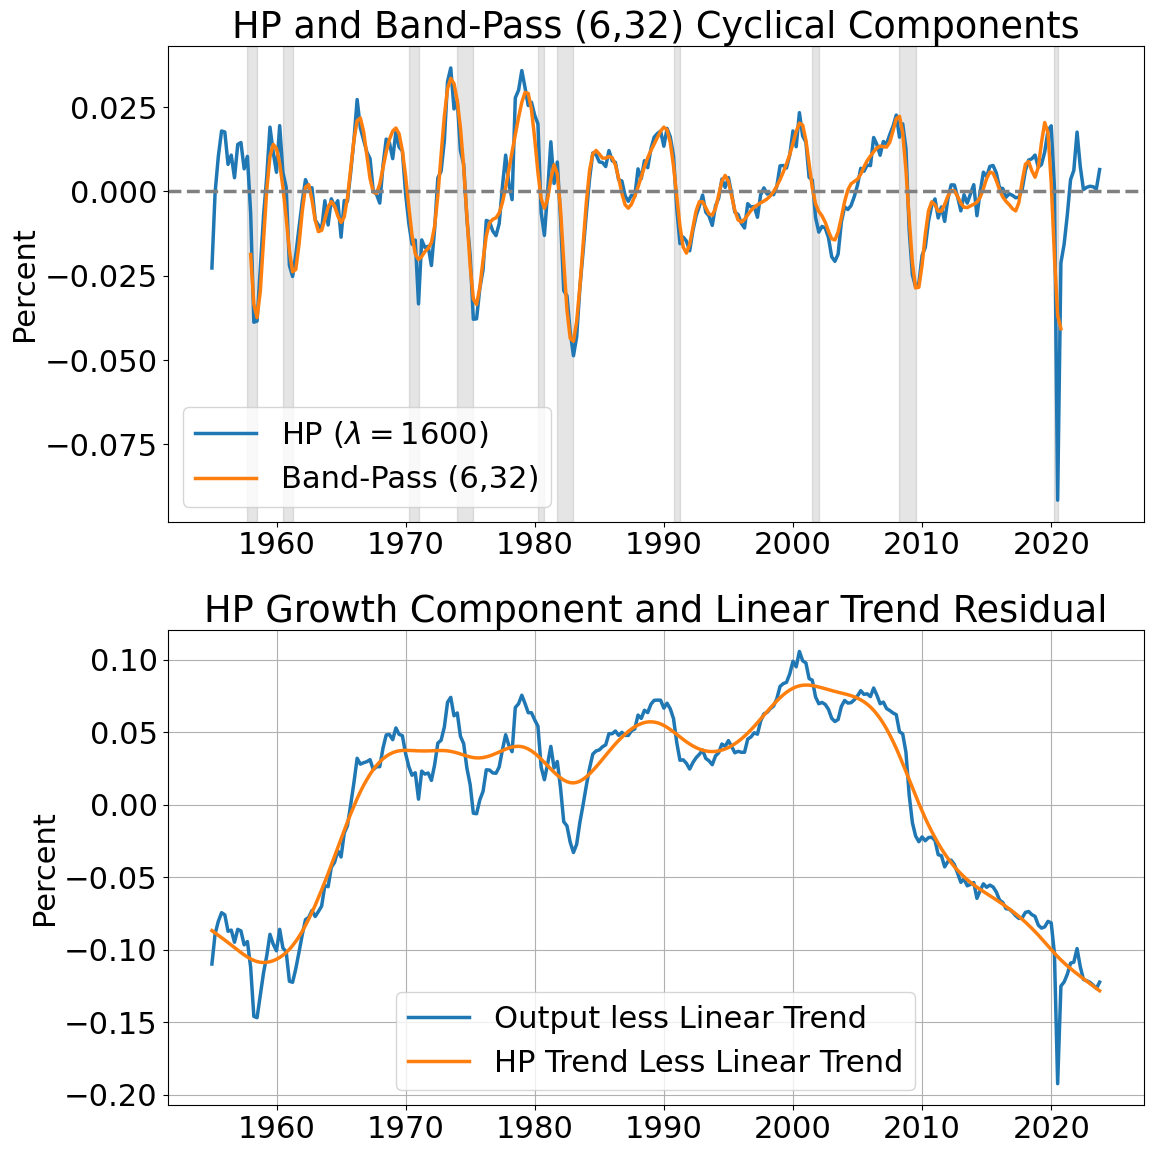

In [ ]:
# First graph data preparation
cycle_ypop, trend_ypop = sm.tsa.filters.hpfilter(np.log(series['ypop']), lambdahp)
cycle_ypop_bp = sm.tsa.filters.bkfilter(np.log(series['ypop']), low=6, high=32, K=12)

# Second graph data preparation
output_less_linear_trend = (np.log(series['y']) - series['ylogfit'])
cycle_y_1600, trend_y_1600 = sm.tsa.filters.hpfilter(np.log(series['y']), lambdahp)
hp_trend_less_linear_trend = (trend_y_1600 - series['ylogfit'])

# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plotting the first graph
axs[0].plot(cycle_ypop, label=r'HP ($\lambda=1600$)')
axs[0].plot(cycle_ypop_bp, label='Band-Pass (6,32)')
yl, yh = axs[0].set_ylim()
axs[0].set_ylabel('Percent')
axs[0].legend()
axs[0].fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
axs[0].set_title('HP and Band-Pass (6,32) Cyclical Components')
axs[0].axhline(y=0, color='gray', linestyle='--')

# Plotting the second graph
axs[1].plot(series.index, output_less_linear_trend, label="Output less Linear Trend")
axs[1].plot(series.index, hp_trend_less_linear_trend, label="HP Trend Less Linear Trend")
axs[1].set_ylabel('Percent')
axs[1].set_title('HP Growth Component and Linear Trend Residual')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## (1) ND consumption less volatile, D consumption more volatile, highly correlated (Lecture 1 Figure 5)

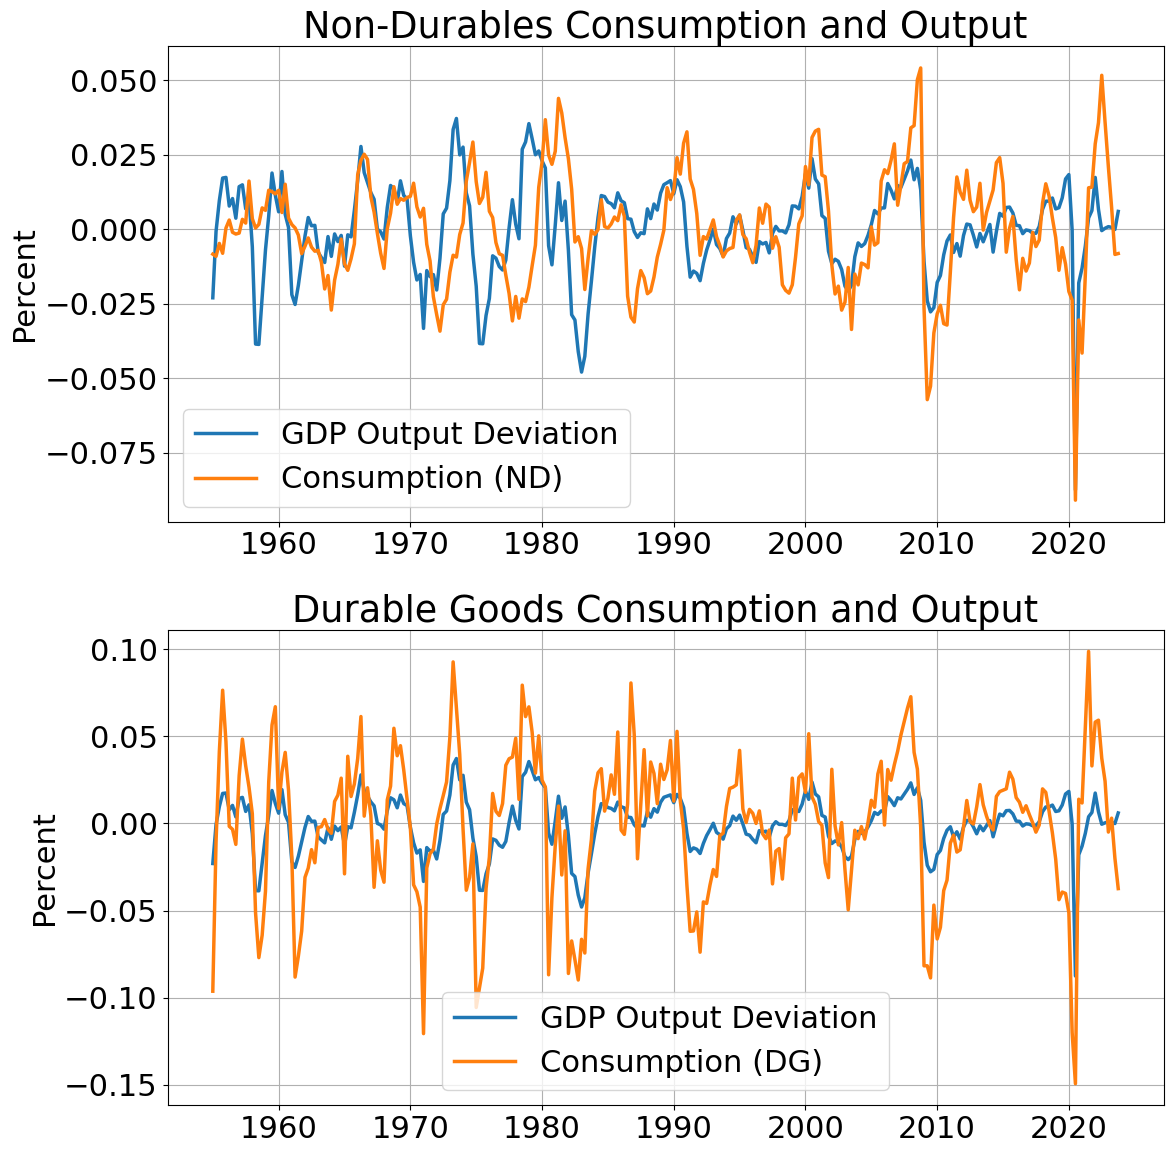

In [ ]:
# Applying the HP filter on the log of 'nondur' (Non-Durable Goods) and 'y' (GDP) series
cycle_nondur, trend_nondur = sm.tsa.filters.hpfilter(np.log(series['nondur']), lambdahp_1600)
cycle_y_1600, trend_y_1600 = sm.tsa.filters.hpfilter(np.log(series['y']), lambdahp_1600)

# Applying the HP filter on the log of 'dur' (Durable Goods) and 'y' (GDP) series
cycle_dur, trend_dur = sm.tsa.filters.hpfilter(np.log(series['dur']), lambdahp_1600)

# Creating 2x1 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plotting Non-Durable Goods on the first subplot
axes[0].plot(series.index, cycle_y_1600, label='GDP Output Deviation')
axes[0].plot(series.index, cycle_nondur, label='Consumption (ND)')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_title('Non-Durables Consumption and Output')

# Plotting Durable Goods on the second subplot
axes[1].plot(series.index, cycle_y_1600, label='GDP Output Deviation')  # Reusing cycle_y_1600 as it's the same GDP data
axes[1].plot(series.index, cycle_dur, label='Consumption (DG)')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_title('Durable Goods Consumption and Output')

# Display the plot
plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

## (2) Investment highly procyclical and Government Spending countercyclical (Lecture 1 Figure 5)

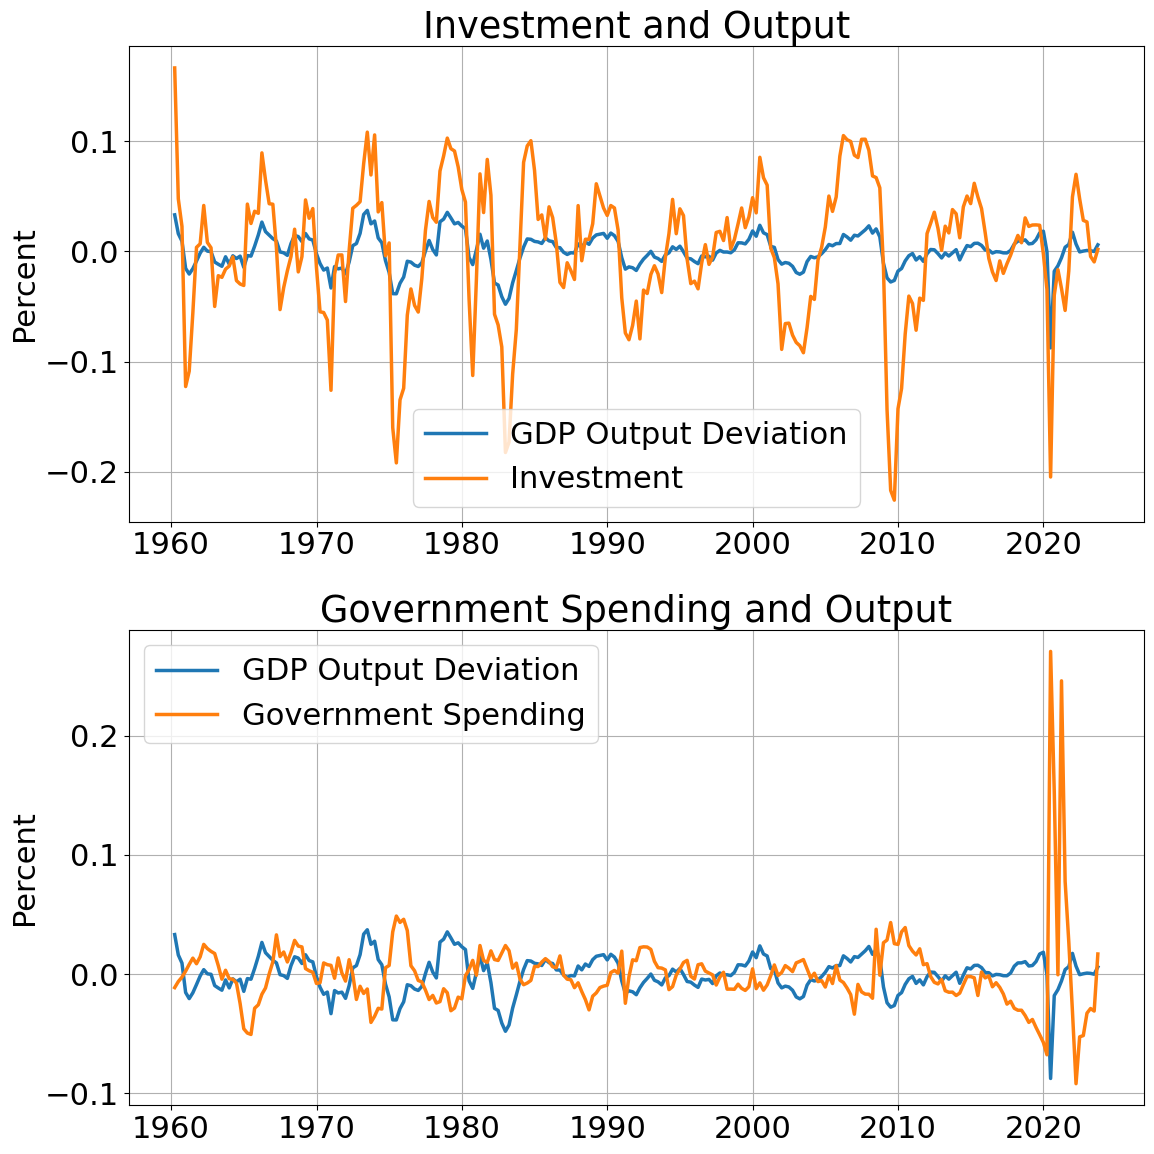

In [ ]:
# Truncating the series data to 1960 onwards to create a new series
series_1960_onwards = series[series.index.year >= 1960].copy()

# Applying the HP filter on the log of 'invest' (Investment) and 'y' (GDP) series from 1960 onwards
cycle_invest_1960, trend_invest_1960 = sm.tsa.filters.hpfilter(np.log(series_1960_onwards['invest']), lambdahp_1600)
cycle_y_1960, trend_y_1960 = sm.tsa.filters.hpfilter(np.log(series_1960_onwards['y']), lambdahp_1600)

# Applying the HP filter on the log of 'govexpen' (Government Spending) and 'y' (GDP) series from 1960 onwards
cycle_govexpen_1960, trend_govexpen_1960 = sm.tsa.filters.hpfilter(np.log(series_1960_onwards['govexpen']), lambdahp_1600)

# Creating 2x1 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plotting Investment on the first subplot
axes[0].plot(series_1960_onwards.index, cycle_y_1960, label='GDP Output Deviation')
axes[0].plot(series_1960_onwards.index, cycle_invest_1960, label='Investment')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_title('Investment and Output')

# Plotting Government Spending on the second subplot
axes[1].plot(series_1960_onwards.index, cycle_y_1960, label='GDP Output Deviation')
axes[1].plot(series_1960_onwards.index, cycle_govexpen_1960, label='Government Spending')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_title('Government Spending and Output')

# Adjusts the subplots to fit into the figure area.
plt.tight_layout()

## (3) Hours track output, capital mildly procyclical (Lecture 1 Figure 6)

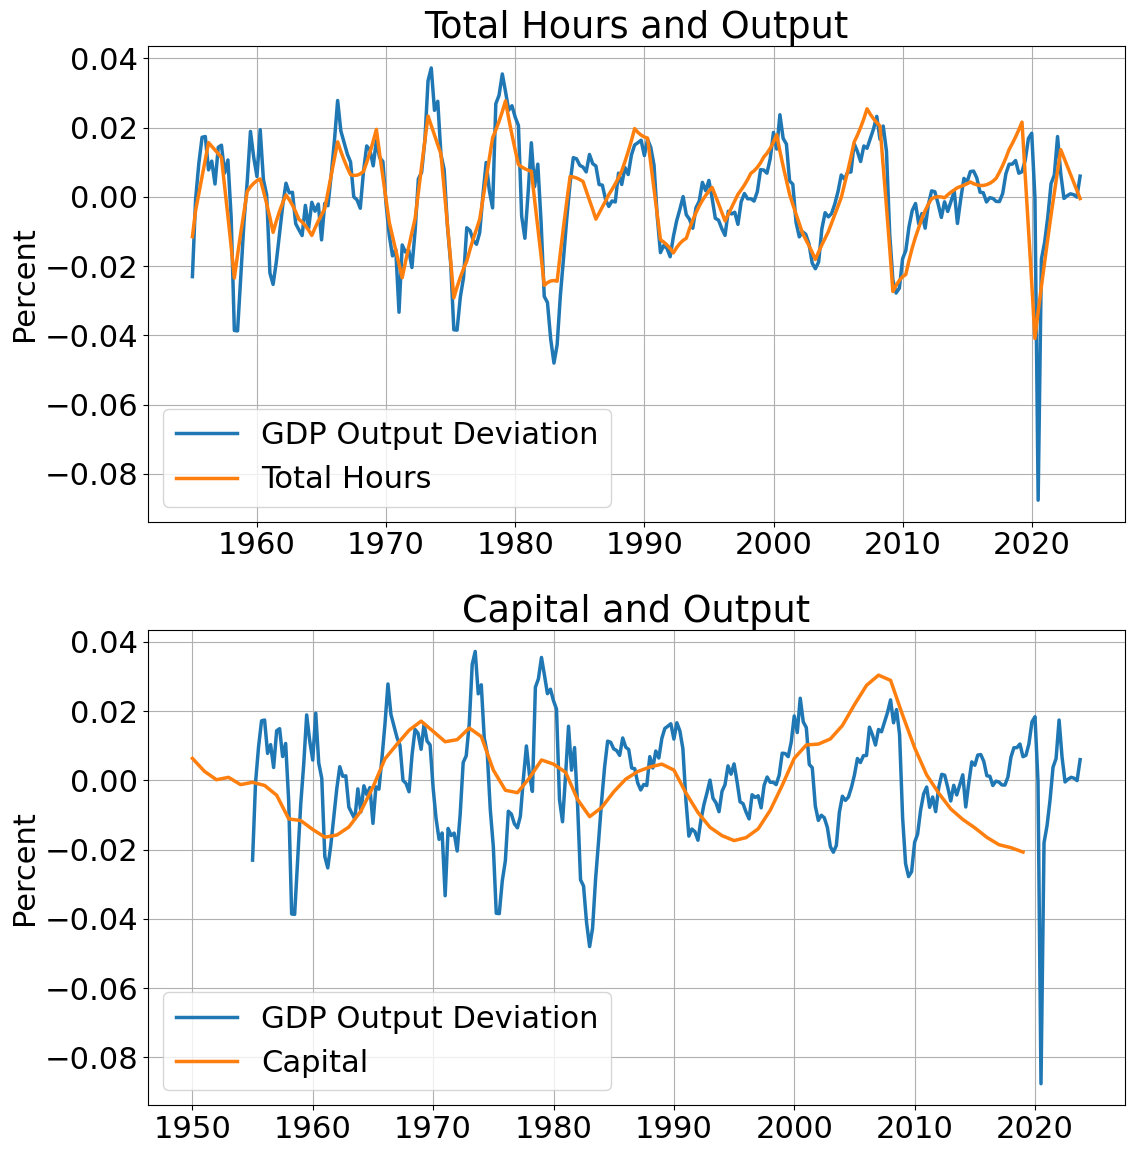

In [ ]:
# Applying the HP filter on the log of 'thours' (Total Hours) and 'y' (GDP) series
cycle_thours, trend_thours = sm.tsa.filters.hpfilter(np.log(series['thours']), lambdahp_1600)
cycle_y, trend_y = sm.tsa.filters.hpfilter(np.log(series['y']), lambdahp_1600)

# Applying the HP filter on the log of 'capital' series
cycle_capital, trend_capital = sm.tsa.filters.hpfilter(np.log(capital), lambdahp_1600)

# Creating 2x1 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plotting Total Hours on the first subplot
axes[0].plot(series.index, cycle_y, label='GDP Output Deviation')
axes[0].plot(series.index, cycle_thours, label='Total Hours')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_title('Total Hours and Output')

# Plotting Capital on the second subplot
# As the data might not be of the same length, it's important to align the indices of the two series being plotted.
# Assuming 'capital' has its own datetime index that aligns with 'series' index for corresponding dates.
axes[1].plot(series.index, cycle_y, label='GDP Output Deviation')  # Reusing cycle_y as it's the same GDP data
axes[1].plot(capital.index, cycle_capital, label='Capital')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_title('Capital and Output')

# Adjusts the subplots to fit into the figure area.
plt.tight_layout()

## (4) Utilization strongly procyclical, Solow residual procyclical (Lecture 1 Figure 7)

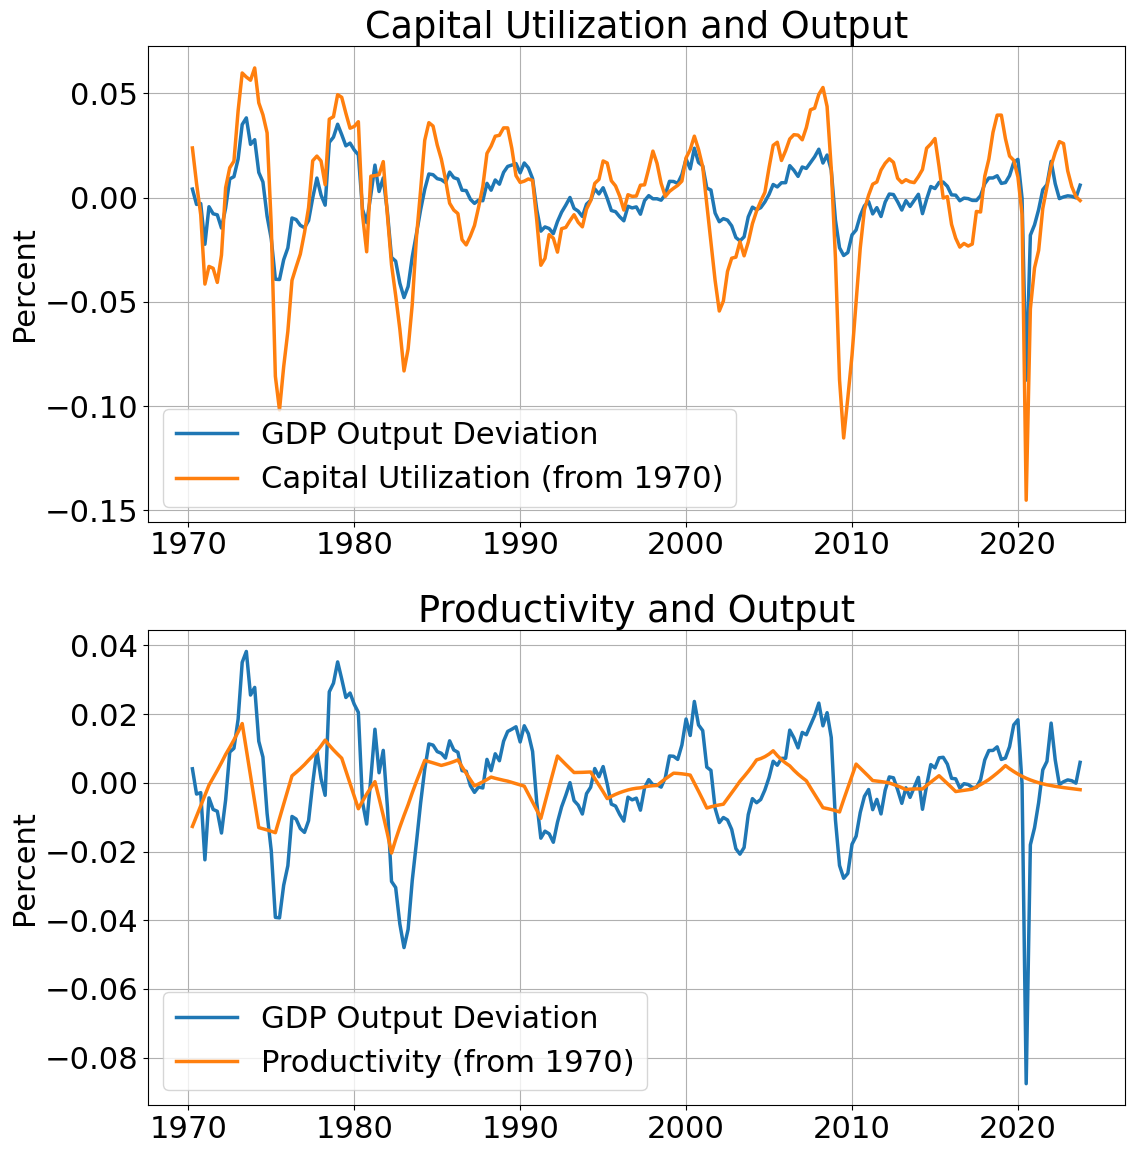

In [ ]:
# Truncating the series data from 1970 onward to create a new dataset
series_1970_onwards = series[series.index.year >= 1970].copy()

# Truncating 'capitalu' and 'solow' from the new series data for 1970 onwards
capitalu_1970_onwards = series_1970_onwards['capitalu']
solow_1970_onwards = series_1970_onwards['solow']

# Applying the HP filter on the truncated log of 'capitalu' (Capital Utilization) and 'y' (GDP) series from 1970 onwards
cycle_capitalu_1970, trend_capitalu_1970 = sm.tsa.filters.hpfilter(np.log(capitalu_1970_onwards), lambdahp_1600)
cycle_y_1970, trend_y_1970 = sm.tsa.filters.hpfilter(np.log(series_1970_onwards['y']), lambdahp_1600)

# Applying the HP filter on the truncated log of 'solow' (Productivity) series from 1970 onwards
cycle_solow_1970, trend_solow_1970 = sm.tsa.filters.hpfilter(np.log(solow_1970_onwards), lambdahp_1600)

# Creating 2x1 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plotting Capital Utilization from 1970 onwards on the first subplot
axes[0].plot(series_1970_onwards.index, cycle_y_1970, label='GDP Output Deviation')
axes[0].plot(series_1970_onwards.index, cycle_capitalu_1970, label='Capital Utilization (from 1970)')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_title('Capital Utilization and Output')

# Plotting Productivity from 1970 onwards on the second subplot
axes[1].plot(series_1970_onwards.index, cycle_y_1970, label='GDP Output Deviation')  # Reusing cycle_y_1970 as it's the same GDP data
axes[1].plot(series_1970_onwards.index, cycle_solow_1970, label='Productivity (from 1970)')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_title('Productivity and Output')

# Adjusts the subplots to fit into the figure area.
plt.tight_layout()